# Bagging

Let's implement some bagged LGBM models

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

from helpers import preprocess_data_lgbm, lgb_f1_micro

import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from tqdm.notebook import trange, tqdm
from sklearn.model_selection import StratifiedKFold, train_test_split

import wandb
from wandb.lightgbm import wandb_callback
wandb.login()

sns.set()

### USE FOR LOCAL JUPYTER NOTEBOOKS ###
DOWNLOAD_DIR = Path('../download')
DATA_DIR = Path('../data')
SUBMISSIONS_DIR = Path('../submissions')
MODEL_DIR = Path('../models')
#######################################

X, y, cat_cols, feature_names = preprocess_data_lgbm()

wandb: Currently logged in as: theadammurphy (use `wandb login --relogin` to force relogin)


In [ ]:
param = {'num_leaves': 120,
         'min_child_samples': 40,
         'learning_rate': 0.2,
         'boosting_type': 'goss',
         'objective': 'multiclass',
         'num_class': 3,
         'verbosity': -1,
         'num_threads': 8,
         'seed': 1}

bags = 50
bagged_prediction = np.zeros(X_test.shape[0])

for n in range(bags):
    print(f'Bag: {n}')
    param['seed'] += n
    booster = lgb.train(param,
                        train_data,
                        30,
                        categorical_feature=list(cat_cols_plus_geo),
                        feval=lgb_f1_micro)
    
    prob_preds = booster.predict(ct.transform(X_test))
    preds = [np.argmax(p) + 1 for p in prob_preds]
    bagged_prediction += preds

Bag: 0
Bag: 1
Bag: 2
Bag: 3
Bag: 4
Bag: 5
Bag: 6
Bag: 7
Bag: 8
Bag: 9


How am I supposed to know if this model is better without testing it beforehand? Let's just make a model and submit it and see what the score is first and then worry about more submissions after. If I have a range of submissions I want to try, I can just build them up and submit new ones each day. I can even create a list of those I want to submit

In [ ]:
np.unique(bagged_prediction / 10)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [ ]:
bagged_prediction /= 10

In [ ]:
rounded_preds = [int(round(pred)) for pred in bagged_prediction]

In [ ]:
sub_format = pd.read_csv(DOWNLOAD_DIR / 'submission_format.csv',
                         index_col='building_id')

my_sub = pd.DataFrame(data=rounded_preds,
                      columns=sub_format.columns,
                      index=sub_format.index)

title = '03-09 - LGBM API - lgbm_02_02 hyperparams - 10 bags, 30 rounds'

my_sub.to_csv(SUBMISSIONS_DIR / f'{title}.csv')

Woo jumped to 0.7469 
From 228 to 167

In [ ]:
def build_and_submit_bagged_lgbm(num_bags, title):
    param = {'num_leaves': 120,
         'min_child_samples': 40,
         'learning_rate': 0.2,
         'boosting_type': 'goss',
         'objective': 'multiclass',
         'num_class': 3,
         'verbosity': -1,
         'num_threads': 8,
         'seed': 1}

    bagged_prediction = np.zeros(X_test.shape[0])

    for n in range(num_bags):
        print(f'Bag: {n}')
        param['seed'] += n
        booster = lgb.train(param,
                            train_data,
                            30,
                            categorical_feature=list(cat_cols_plus_geo),
                            feval=lgb_f1_micro)

        prob_preds = booster.predict(ct.transform(X_test))
        preds = [np.argmax(p) + 1 for p in prob_preds]
        bagged_prediction += preds
        
    bagged_prediction /= num_bags
    rounded_preds = [int(round(pred)) for pred in bagged_prediction]
    
    sub_format = pd.read_csv(DOWNLOAD_DIR / 'submission_format.csv',
                         index_col='building_id')

    my_sub = pd.DataFrame(data=rounded_preds,
                          columns=sub_format.columns,
                          index=sub_format.index)

    my_sub.to_csv(SUBMISSIONS_DIR / f'{title}.csv')
    print('Submission created successfully!')

In [ ]:
title = '03-09 - LGBM API - lgbm_02_02 hyperparams - 50 bags, 30 rounds'
build_and_submit_bagged_lgbm(50, title)

Bag: 0
Bag: 1
Bag: 2
Bag: 3
Bag: 4
Bag: 5
Bag: 6
Bag: 7
Bag: 8
Bag: 9
Bag: 10
Bag: 11
Bag: 12
Bag: 13
Bag: 14
Bag: 15
Bag: 16
Bag: 17
Bag: 18
Bag: 19
Bag: 20
Bag: 21
Bag: 22
Bag: 23
Bag: 24
Bag: 25
Bag: 26
Bag: 27
Bag: 28
Bag: 29
Bag: 30
Bag: 31
Bag: 32
Bag: 33
Bag: 34
Bag: 35
Bag: 36
Bag: 37
Bag: 38
Bag: 39
Bag: 40
Bag: 41
Bag: 42
Bag: 43
Bag: 44
Bag: 45
Bag: 46
Bag: 47
Bag: 48
Bag: 49
Submission created successfully!


This got 0.7478!! From 168 to 132 (36 place jumps)

In [ ]:
title = '03-09 - LGBM API - lgbm_02_02 hyperparams - 250 bags, 30 rounds'
build_and_submit_bagged_lgbm(250, title)

Bag: 0
Bag: 1
Bag: 2
Bag: 3
Bag: 4
Bag: 5
Bag: 6
Bag: 7
Bag: 8
Bag: 9
Bag: 10
Bag: 11
Bag: 12
Bag: 13
Bag: 14
Bag: 15
Bag: 16
Bag: 17
Bag: 18
Bag: 19
Bag: 20
Bag: 21
Bag: 22
Bag: 23
Bag: 24
Bag: 25
Bag: 26
Bag: 27
Bag: 28
Bag: 29
Bag: 30
Bag: 31
Bag: 32
Bag: 33
Bag: 34
Bag: 35
Bag: 36
Bag: 37
Bag: 38
Bag: 39
Bag: 40
Bag: 41
Bag: 42
Bag: 43
Bag: 44
Bag: 45
Bag: 46
Bag: 47
Bag: 48
Bag: 49
Bag: 50
Bag: 51
Bag: 52
Bag: 53
Bag: 54
Bag: 55
Bag: 56
Bag: 57
Bag: 58
Bag: 59
Bag: 60
Bag: 61
Bag: 62
Bag: 63
Bag: 64
Bag: 65
Bag: 66
Bag: 67
Bag: 68
Bag: 69
Bag: 70
Bag: 71
Bag: 72
Bag: 73
Bag: 74
Bag: 75
Bag: 76
Bag: 77
Bag: 78
Bag: 79
Bag: 80
Bag: 81
Bag: 82
Bag: 83
Bag: 84
Bag: 85
Bag: 86
Bag: 87
Bag: 88
Bag: 89
Bag: 90
Bag: 91
Bag: 92
Bag: 93
Bag: 94
Bag: 95
Bag: 96
Bag: 97
Bag: 98
Bag: 99
Bag: 100
Bag: 101
Bag: 102
Bag: 103
Bag: 104
Bag: 105
Bag: 106
Bag: 107
Bag: 108
Bag: 109
Bag: 110
Bag: 111
Bag: 112
Bag: 113
Bag: 114
Bag: 115
Bag: 116
Bag: 117
Bag: 118
Bag: 119
Bag: 120
Bag: 121
Bag: 122
Bag

This got 0.7482
Climbed from 132 --> 115 (17 place jump)

# Bagging Multiple Models

Since these were so good, let's make loads of different good models and bag them together

In [12]:
def calc_bagged_preds(param, num_bags):
    bagged_prediction = np.zeros(X_test.shape[0])

    for n in trange(num_bags):
#         if n % 25 == 0:
#             print(f'    Bag {n} complete')
        param['seed'] += n
        booster = lgb.train(param,
                            train_data,
                            30, # should tune this as well but need valid data 
                            categorical_feature=list(cat_cols_plus_geo),
                            feval=lgb_f1_micro)

        prob_preds = booster.predict(ct.transform(X_test))
        preds = [np.argmax(p) + 1 for p in prob_preds]
        bagged_prediction += preds

    bagged_prediction /= num_bags
    rounded_preds = [int(round(pred)) for pred in bagged_prediction]
    return rounded_preds


def submit_preds(preds, title):
    sub_format = pd.read_csv(DOWNLOAD_DIR / 'submission_format.csv',
                             index_col='building_id')

    my_sub = pd.DataFrame(data=preds,
                          columns=sub_format.columns,
                          index=sub_format.index)

    my_sub.to_csv(SUBMISSIONS_DIR / f'{title}.csv')

In [13]:
def build_and_submit_bagged_ensemble_lgbm(n_models, n_bags, title):
    """
    We will now not just bag one model but bag multiple models, so 50 different
    esimators all grouped together. Clever.
    """
    # The major hyperparams we will tune
    num_leaves = np.arange(100, 230, 10)
    num_iterations = np.arange(100, 400, 10)
    min_child_samples = np.arange(30, 80, 5)
    lr = np.array([0.1, 0.15, 0.2])
    boosting_type = ['goss', 'dart']
    
    ensemble_predictions = np.zeros(X_test.shape[0])
    
    for i in range(n_models):
        print(f'Making preds for estimator #{i}')
        # Create new estimator
        param = {'num_leaves': np.random.choice(num_leaves),
#                  'num_iterations': np.random.choice(num_iterations),
#                  'min_child_samples': np.random.choice(min_child_samples),
                 'learning_rate': np.random.choice(lr),
                 'boosting_type': np.random.choice(boosting_type),
                 'objective': 'multiclass',
                 'num_class': 3,
                 'verbosity': -1,
                 'num_threads': 8,
                 'seed': 1}
#                  'device': 'gpu'}
        
        bagged_preds = calc_bagged_preds(param, n_bags)
        ensemble_predictions += bagged_preds
    
    ensemble_predictions /= n_models
    rounded_preds = [int(round(pred)) for pred in ensemble_predictions]

    submit_preds(rounded_preds, title)
    print('Submission created successfully!')

In [14]:
n_models = 20
n_bags = 100
title = f'03-12 LGBM API ensemble - {n_models} models - {n_bags} bags - 30 num_boost_round'
build_and_submit_bagged_ensemble_lgbm(n_models, n_bags, title)

Making preds for estimator #0


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #1


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #2


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #3


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #4


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #5


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #6


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #7


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #8


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #9


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #10


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #11


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #12


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #13


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #14


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #15


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #16


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #17


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #18


  0%|          | 0/100 [00:00<?, ?it/s]

Making preds for estimator #19


  0%|          | 0/100 [00:00<?, ?it/s]

Submission created successfully!


## Bagged Models with WandB

Let's build one model first and see how we can interact with it. I want to get some plots to see how we can use validation data. But using the LGBM API is SO MUCH BETTER than using the sklearn API for LightGBM, so let's play with this and see what happens.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_all_ints, y, test_size=0.25,
                                                 random_state=42, stratify=y)

full_train_data = lgb.Dataset(X_all_ints,
                             label=y,
#                              feature_name=list(cols_ordered_after_ordinal_encoding),
#                              categorical_feature=list(cat_cols_plus_geo),
                             free_raw_data=False)

train_data = lgb.Dataset(X_train,
                        label=y_train,
#                         feature_name=list(cols_ordered_after_ordinal_encoding),
#                         categorical_feature=list(cat_cols_plus_geo),
                        free_raw_data=False)

val_data = lgb.Dataset(X_val,
                      label=y_val,
#                       feature_name=list(cols_ordered_after_ordinal_encoding),
#                       categorical_feature=list(cat_cols_plus_geo),
                      free_raw_data=False)

In [62]:
param = {'num_leaves': 120,
         'min_child_samples': 40,
         'learning_rate': 0.03,
         'num_boost_round': 40,
         'early_stopping_rounds': 12,
         'boosting_type': 'goss',
         'objective': 'multiclassova',
         'is_unbalance': True,
         'metric': ['multiclassova', 'multi_error'],
         'num_class': 3,
         'verbosity': -1,
         'num_threads': 8,
         'seed': 1}

run = wandb.init(project='earthquake_damage_competition',
                 config=param)

train_multi_logloss,0.74785
train_multi_error,0.43109
train_f1,0.56891
val_multi_logloss,0.75516
val_multi_error,0.43109
val_f1,0.56891
_step,8
_runtime,18
_timestamp,1615823370


train_multi_logloss,█▆▅▃▂▁
train_multi_error,▁▁▁▁▁▁
train_f1,▁▁▁▁▁▁
val_multi_logloss,█▆▅▃▂▁
val_multi_error,▁▁▁▁▁▁
val_f1,▁▁▁▁▁▁
_step,▁▂▃▄▅▅▆▇█
_runtime,▁▂▄▅▆▇▇██
_timestamp,▁▂▄▅▆▇▇██


wandb: wandb version 0.10.22 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [63]:
evals_result = {}
booster = lgb.train(dict(wandb.config), # doesn't work if I pass wandb.config
                    train_data,
#                     100, # let's see if this works by setting it in param instead
                    # You can include train_data in the valid_set to easily
                    # make plots of the loss functions
                    valid_sets=[train_data, val_data],
                    valid_names=['train', 'val'],
                    evals_result=evals_result,
#                     early_stopping_rounds=None,
                    categorical_feature=list(cat_cols_plus_geo),
                    feature_name=list(cols_ordered_after_ordinal_encoding)
                    feval=lgb_f1_micro,
                    callbacks=[wandb_callback()])

/Users/king/opt/anaconda3/envs/tabular/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/king/opt/anaconda3/envs/tabular/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	train's multi_logloss: 0.878332	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.879566	val's multi_error: 0.431091	val's f1: 0.568909
[2]	train's multi_logloss: 0.849732	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.852089	val's multi_error: 0.431091	val's f1: 0.568909
[3]	train's multi_logloss: 0.824889	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.828344	val's multi_error: 0.431091	val's f1: 0.568909
[4]	train's multi_logloss: 0.802945	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.807452	val's multi_error: 0.431091	val's f1: 0.568909
[5]	train's multi_logloss: 0.783222	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.788692	val's multi_error: 0.431091	val's f1: 0.568909
[6]	train's multi_logloss: 0.765193	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.771723	val's multi_error: 0.431091	val's f1: 0.568909
[7]	train's mult

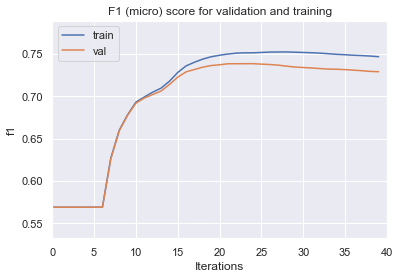

In [64]:
f1_plot = lgb.plot_metric(evals_result, metric='f1',
                          title='F1 (micro) score for validation and training')
wandb.log({'f1_score plot': wandb.Image(f1_plot)})
plt.show()

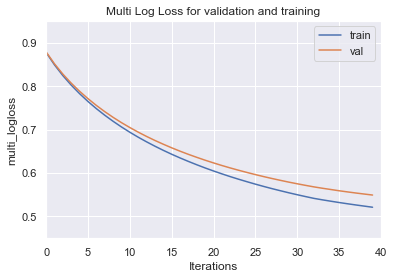

In [65]:
log_loss_plot = lgb.plot_metric(evals_result, metric='multi_logloss',
                title='Multi Log Loss for validation and training')
wandb.log({'multi logloss plot': wandb.Image(log_loss_plot)})

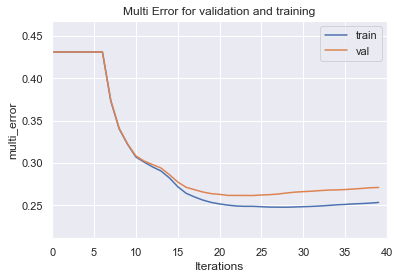

In [66]:
multierror_plot = lgb.plot_metric(evals_result, metric='multi_error',
                title='Multi Error for validation and training')
wandb.log({'multi error plot': wandb.Image(multierror_plot)})

In [67]:
run.finish()

train_multi_logloss,0.52111
train_multi_error,0.25346
train_f1,0.74654
val_multi_logloss,0.54925
val_multi_error,0.27119
val_f1,0.72881
_step,42
_runtime,88
_timestamp,1615823527


train_multi_logloss,█▇▇▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
train_multi_error,███████▆▅▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1,▁▁▁▁▁▁▁▃▄▅▆▆▆▆▇▇▇███████████████████████
val_multi_logloss,█▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_multi_error,███████▆▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_f1,▁▁▁▁▁▁▁▃▅▅▆▆▆▇▇▇████████████████████████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇█████
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇█████


## Validating Bagged Models

In [42]:
def get_train_val_datasets(X, y, train_idx, val_idx):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    train_dataset = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    val_dataset = lgb.Dataset(X_val, label=y_val, free_raw_data=False)
    train_dataset.construct()
    val_dataset.construct()
    return train_dataset, val_dataset


def train_lgbm_model(config, train_dataset, val_dataset):
        evals_result = {}
        booster = lgb.train(config,
                           train_dataset,
                           valid_sets=[train_dataset, val_dataset],
                           valid_names=['train', 'val'],
                           evals_result=evals_result,
                           feval=lgb_f1_micro,
                           callbacks=[wandb_callback()])
        return booster, evals_result

def eval_bagged_model(config, num_bags, train_dataset, val_dataset):
    bagged_preds = np.zeros(val_dataset.num_data())
    config = dict(config) # in case you input a wandb config object
    for n in range(num_bags):
        config['seed'] += n
        booster, evals_result = train_lgbm_model(config, train_dataset,
                                                val_dataset)
        # Do I need to predict? Does the callback do it for me automatically?
        pass

In [43]:
param = {'num_leaves': 120,
         'min_child_samples': 40,
         'learning_rate': 0.03,
         'num_boost_round': 40,
         'early_stopping_rounds': 12,
         'boosting_type': 'goss',
         'objective': 'multiclassova',
         'is_unbalance': True,
         'metric': ['multiclassova', 'multi_error'],
         'num_class': 3,
         'verbosity': -1,
         'num_threads': 8,
         'seed': 1}

run = wandb.init(project='earthquake_damage_competition',
                 config=param)

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

all_eval_results = {}
all_boosters = {}
i = 0
# Cross-validation loop
for train_idx, val_idx in skf.split(X_all_ints, y):
    train_dataset, val_dataset = get_train_val_datasets(X_all_ints, y,
                                                       train_idx, val_idx)
    # Perform bagged model building and evaluation to get a score
    booster, evals_results = train_lgbm_model(param, train_dataset,
                                             val_dataset)
    all_eval_results[i] = evals_results
    all_boosters[i] = booster
    i += 1

wandb: wandb version 0.10.22 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/Users/king/opt/anaconda3/envs/tabular/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/king/opt/anaconda3/envs/tabular/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096407 -> initscore=-2.237796
[LightGBM] [Info] Start training from score -2.237796
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568913 -> initscore=0.277418
[LightGBM] [Info] Start training from score 0.277418
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334680 -> initscore=-0.687095
[LightGBM] [Info] Start training from score -0.687095
[1]	train's multi_logloss: 0.883158	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.883456	val's multi_error: 0.431093	val's f1: 0.568907
Training until validation scores don't improve for 12 rounds
[2]	train's multi_logloss: 0.858694	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.859218	val's multi_error: 0.431093	val's f1: 0.568907
[3]	train's multi_logloss: 0.837792	train's multi_error: 0.431087	train's f1: 0.568913	val's multi_logloss: 0.838495	val's multi_error: 0.431093	val's f1: 0.568907
[4]	train's multi_logloss: 0.819383	train's mul

[9]	train's multi_logloss: 0.750511	train's multi_error: 0.371741	train's f1: 0.628259	val's multi_logloss: 0.751676	val's multi_error: 0.373139	val's f1: 0.626861
[10]	train's multi_logloss: 0.739887	train's multi_error: 0.366379	train's f1: 0.633621	val's multi_logloss: 0.741199	val's multi_error: 0.368227	val's f1: 0.631773
[11]	train's multi_logloss: 0.729978	train's multi_error: 0.355342	train's f1: 0.644658	val's multi_logloss: 0.731415	val's multi_error: 0.355334	val's f1: 0.644666
[12]	train's multi_logloss: 0.720642	train's multi_error: 0.344962	train's f1: 0.655038	val's multi_logloss: 0.722131	val's multi_error: 0.345549	val's f1: 0.654451
[13]	train's multi_logloss: 0.711804	train's multi_error: 0.338952	train's f1: 0.661048	val's multi_logloss: 0.713404	val's multi_error: 0.339351	val's f1: 0.660649
[14]	train's multi_logloss: 0.703635	train's multi_error: 0.334165	train's f1: 0.665835	val's multi_logloss: 0.705345	val's multi_error: 0.335399	val's f1: 0.664601
[15]	train'

[20]	train's multi_logloss: 0.66301	train's multi_error: 0.301462	train's f1: 0.698538	val's multi_logloss: 0.666804	val's multi_error: 0.304125	val's f1: 0.695875
[21]	train's multi_logloss: 0.657412	train's multi_error: 0.298205	train's f1: 0.701795	val's multi_logloss: 0.661317	val's multi_error: 0.301842	val's f1: 0.698158
[22]	train's multi_logloss: 0.652134	train's multi_error: 0.297701	train's f1: 0.702299	val's multi_logloss: 0.65614	val's multi_error: 0.301362	val's f1: 0.698638
[23]	train's multi_logloss: 0.647077	train's multi_error: 0.296871	train's f1: 0.703129	val's multi_logloss: 0.651181	val's multi_error: 0.30094	val's f1: 0.69906
[24]	train's multi_logloss: 0.6422	train's multi_error: 0.297533	train's f1: 0.702467	val's multi_logloss: 0.646458	val's multi_error: 0.301094	val's f1: 0.698906
[25]	train's multi_logloss: 0.637581	train's multi_error: 0.29773	train's f1: 0.70227	val's multi_logloss: 0.641929	val's multi_error: 0.301209	val's f1: 0.698791
[26]	train's multi

[31]	train's multi_logloss: 0.614386	train's multi_error: 0.301131	train's f1: 0.698869	val's multi_logloss: 0.616892	val's multi_error: 0.302609	val's f1: 0.697391
[32]	train's multi_logloss: 0.611008	train's multi_error: 0.301481	train's f1: 0.698519	val's multi_logloss: 0.613616	val's multi_error: 0.303185	val's f1: 0.696815
[33]	train's multi_logloss: 0.60763	train's multi_error: 0.301783	train's f1: 0.698217	val's multi_logloss: 0.610327	val's multi_error: 0.303492	val's f1: 0.696508
[34]	train's multi_logloss: 0.604729	train's multi_error: 0.301951	train's f1: 0.698049	val's multi_logloss: 0.607529	val's multi_error: 0.303684	val's f1: 0.696316
[35]	train's multi_logloss: 0.601861	train's multi_error: 0.301965	train's f1: 0.698035	val's multi_logloss: 0.604738	val's multi_error: 0.303492	val's f1: 0.696508
Early stopping, best iteration is:
[23]	train's multi_logloss: 0.6476	train's multi_error: 0.296224	train's f1: 0.703776	val's multi_logloss: 0.649315	val's multi_error: 0.2991